In [1]:
# import packages and read csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = pd.read_csv('DTI_with_group_num.csv')
features.head(5)

,IMAGEUID,COLPROT,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,MANUFACTURER,VOLUMES,RUNDATE,...,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,update_stamp,Sex,Research Group,Age
0,957753,ADNI3,21,init,m144,1/25/18,2.0,Siemens,55,12/1/21,...,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,NaN,F,0,84.9
1,987377,ADNI3,31,init,m150,4/17/18,NaN,Siemens,127,12/1/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0,90.3
2,1158142,ADNI3,31,y1,m162,4/24/19,2.0,Siemens,127,12/1/21,...,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,NaN,F,0,91.3
3,1116459,ADNI3,56,y1,m156,1/10/19,2.0,Siemens,127,12/1/21,...,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,NaN,F,0,82.8
4,1189755,ADNI3,56,init,m144,11/28/17,2.0,Siemens,127,12/1/21,...,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,NaN,F,0,81.7


In [2]:
features.describe()

,IMAGEUID,RID,VERSION,VOLUMES,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,...,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,update_stamp,Research Group,Age
count,9.680000e+02,968.000000,934.0,968.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,...,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,0.0,968.000000,968.000000
mean,1.019289e+06,5138.766529,2.0,62.929752,0.001077,0.000982,0.001447,0.001502,0.001544,0.002359,...,0.000634,0.000611,0.001142,0.000477,0.000548,0.000615,0.000562,NaN,1.125000,74.619731
std,1.102226e+05,1763.616817,0.0,34.340940,0.000060,0.000077,0.000073,0.000081,0.000088,0.000246,...,0.000106,0.000058,0.000233,0.000039,0.000074,0.000057,0.000044,NaN,1.535473,7.880330
min,8.088260e+05,21.000000,2.0,31.000000,0.000829,0.000679,0.001210,0.001214,0.001234,0.001629,...,0.000460,0.000441,0.000625,0.000350,0.000373,0.000502,0.000430,NaN,0.000000,55.100000
25%,9.353970e+05,4394.250000,2.0,36.000000,0.001046,0.000939,0.001404,0.001447,0.001496,0.002186,...,0.000561,0.000573,0.000979,0.000452,0.000497,0.000577,0.000533,NaN,0.000000,69.000000
50%,1.005818e+06,6066.500000,2.0,55.000000,0.001082,0.000990,0.001448,0.001498,0.001547,0.002349,...,0.000610,0.000602,0.001117,0.000473,0.000536,0.000604,0.000557,NaN,0.000000,74.150000
75%,1.099537e+06,6370.250000,2.0,55.000000,0.001116,0.001033,0.001491,0.001551,0.001601,0.002503,...,0.000683,0.000641,0.001282,0.000499,0.000595,0.000642,0.000586,NaN,2.000000,80.600000
max,1.332415e+06,6832.000000,2.0,127.000000,0.001266,0.001214,0.001666,0.001790,0.001807,0.003424,...,0.001140,0.000892,0.001913,0.000659,0.000836,0.001018,0.000772,NaN,5.000000,95.900000


In [3]:
# remove unnecessary columns
features = features.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp'], axis=1)

# remove rows with empty values
features = features.dropna()

features.head(5)

,VOLUMES,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,...,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Sex,Research Group,Age
0,55,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,...,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,F,0,84.9
2,127,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,...,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,F,0,91.3
3,127,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,...,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,F,0,82.8
4,127,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,...,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,F,0,81.7
5,127,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,...,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,F,0,83.7


In [4]:
labels = np.array(features['Research Group'])
features = features.drop('Research Group', axis=1)

# one-hot encode
features = pd.get_dummies(features)

feature_list = list(features.columns)
features = np.array(features)

In [5]:
# split dataset into training and testing
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=53)

In [6]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model with decision trees
rf = RandomForestRegressor(n_estimators = 10000, random_state = 53)

# Train the model on training data
rf.fit(train_features, train_labels);

In [7]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 5))

Mean Absolute Error: 1.16347


In [8]:
# get numerical features importance
importances = list(rf.feature_importances_)

# list of tuples with variance and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# sort features importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out features and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AD_SLF_L             Importance: 0.02872
Variable: Age                  Importance: 0.01945
Variable: AD_UNC               Importance: 0.00999
Variable: MD_SCC               Importance: 0.00946
Variable: AD_UNC_L             Importance: 0.00937
Variable: AD_GCC               Importance: 0.00923
Variable: MD_CGH_R             Importance: 0.00861
Variable: AD_SCP_L             Importance: 0.00826
Variable: FA_FX                Importance: 0.00803
Variable: RD_SCC               Importance: 0.00783
Variable: FA_ICP_L             Importance: 0.00776
Variable: RD_CC                Importance: 0.0072
Variable: FA_BCC               Importance: 0.00691
Variable: AD_CGH_L             Importance: 0.00655
Variable: AD_FXST_L            Importance: 0.00648
Variable: RD_CGH_R             Importance: 0.00625
Variable: FA_SCC               Importance: 0.0061
Variable: FA_SCR_R             Importance: 0.00607
Variable: AD_BCC               Importance: 0.00598
Variable: RD_SCP_R             Im

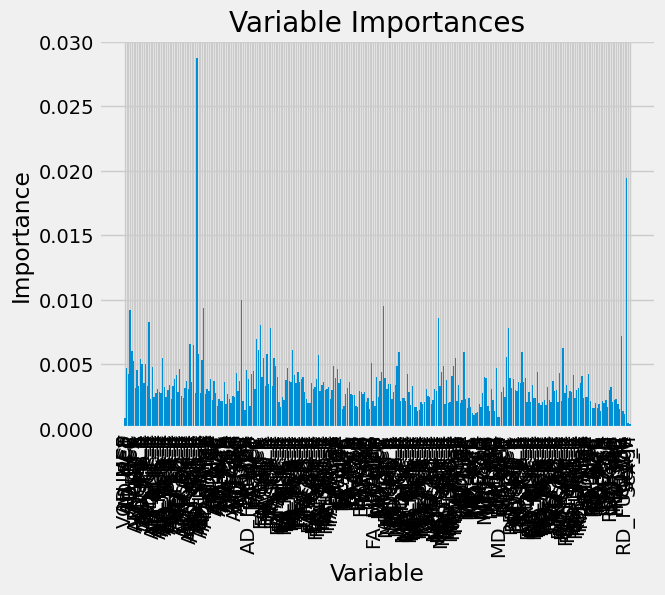

In [9]:
%matplotlib inline

plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');